In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
import graphviz, wavedrom
from IPython.display import display, Markdown

| Input \ State | S0 | S1 |
|:---:|:---:|:---:|
| 0 | S1/0 | S1/0 |
| 1 | S0/0 | S0/1 |


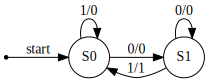

In [2]:
# snail with an Mealy FSM brain
initStateMealy = 'S0'
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunctionMealy = [ ['S0',0,'S1'], ['S0',1,'S0'], ['S1',0,'S1'], ['S1',1,'S0'] ]
# outputFunction Mealy [ [State, inAlphabet, outAlphabet], ...]
outputFunctionMealy = [ ['S0',0,0], ['S0',1,0], ['S1',0,0], ['S1',1,1]]
# short form
brainMealy = FST([], initStateMealy, [], [], transitionFunctionMealy, outputFunctionMealy)
# Visualise FST
display(Markdown(brainMealy.toMdTable()))
graphviz.Source(brainMealy.toDot())

| Input \ State | 0/- | 1/0 | 2/0 | 3/1 |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 1 | 1 |
| 1 | 2 | 3 | 2 | 2 |


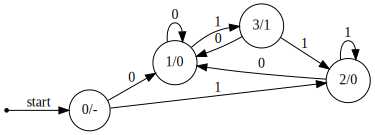

In [3]:
drainMoore = brainMealy.asMoore()
# Visualise drainMoore
display(Markdown(drainMoore.toMdTable()))
graphviz.Source(drainMoore.toDot())

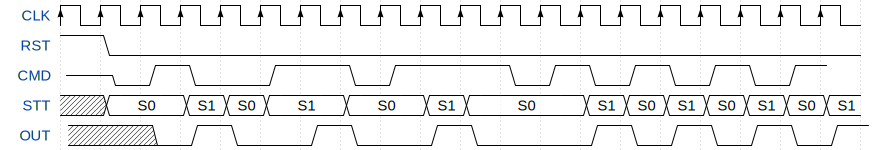

In [4]:
inSignals = [0,1,0,0,1,1,0,1,1,1,0,1,0,1,0,1,0,1]
wavedrom.render(brainMealy.playToWave(inSignals,1,1))

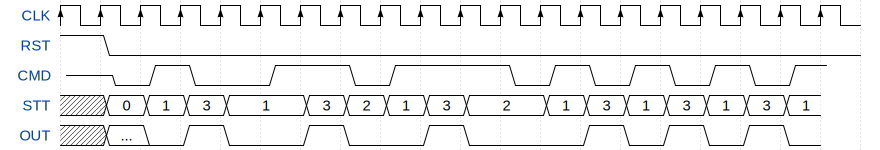

In [5]:
wavedrom.render(drainMoore.playToWave(inSignals,1,1))

| Input \ State | A | B | C | D |
|:---:|:---:|:---:|:---:|:---:|
| 0 | A/0 | A/0 | D/0 | A/0 |
| 1 | B/0 | C/0 | C/0 | B/1 |


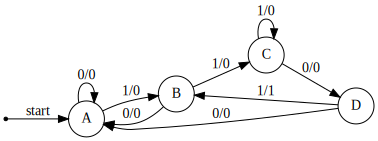

In [6]:
# 1101 Sequence Detector With Overlap
init = 'A'
# transitionFunction [ [State, inAlphabet, nextState], ...]
tr = [ ['A',0,'A'], ['A',1,'B'], ['B',0,'A'], ['B',1,'C'],\
       ['C',0,'D'], ['C',1,'C'], ['D',0,'A'], ['D',1,'B'] ]
# outputFunction Mealy [ [State, inAlphabet, outAlphabet], ...]
out = [ ['A',0,0], ['A',1,0], ['B',0,0], ['B',1,0],\
        ['C',0,0], ['C',1,0], ['D',0,0], ['D',1,1] ]
inputSeqFor_1101_Detect = [0,0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1]
Seq_1101_DetectWithOverlap_Mealy = FST([], init, [], [], tr, out)
# Visualise
display(Markdown(Seq_1101_DetectWithOverlap_Mealy.toMdTable()))
graphviz.Source(Seq_1101_DetectWithOverlap_Mealy.toDot())

| Input \ State | 0/- | 1/0 | 2/0 | 3/0 | 4/0 | 5/1 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 1 | 4 | 1 | 1 |
| 1 | 2 | 2 | 3 | 3 | 5 | 3 |


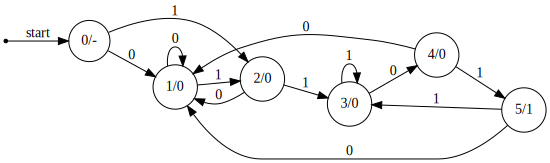

In [7]:
Seq_1101_DetectWithOverlap_Moore = Seq_1101_DetectWithOverlap_Mealy.asMoore()
# Visualise
display(Markdown(Seq_1101_DetectWithOverlap_Moore.toMdTable()))
graphviz.Source(Seq_1101_DetectWithOverlap_Moore.toDot())

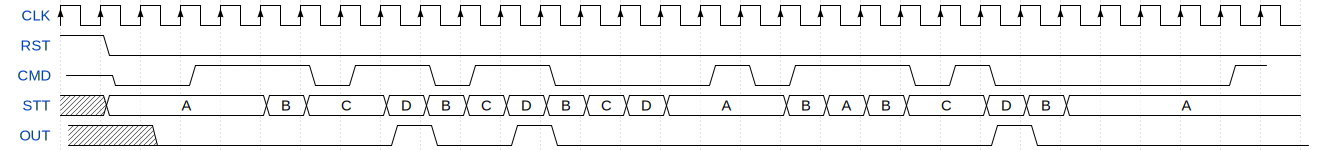

In [8]:
wavedrom.render(Seq_1101_DetectWithOverlap_Mealy.playToWave(inputSeqFor_1101_Detect,1,1))

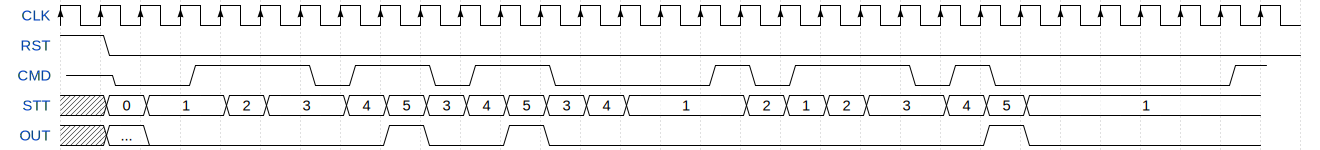

In [9]:
wavedrom.render(Seq_1101_DetectWithOverlap_Moore.playToWave(inputSeqFor_1101_Detect,1,1))

In [10]:
outSignals1, outStates1 = Seq_1101_DetectWithOverlap_Mealy.playFST(inputSeqFor_1101_Detect)
outSignals2, outStates2 = Seq_1101_DetectWithOverlap_Moore.playFST(inputSeqFor_1101_Detect)
print("outSignals Mealy - " + str(outSignals1))
print("outSignals Moore - " + str(outSignals2))

outSignals Mealy - [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
outSignals Moore - [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
